In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# Смотрим данные

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Значения столбцов:  
Unnamed: 0 - индексацияч, которую нужно удалить  
track_id - id трека, не влияет ни на что  
artists - исполнители  песни  
album_name - название альбома  
track_name - название трека  
popularity - таргет. Популярность трека выраженная в числе от 0 до 100  
duration_ms - длитьельность трека в миллисекундах
explicit - есть ли в треке нецензурная брань и откровенные сцены, bool  
danceability - танцевальность трека - число от 0 до 1  
energy - энергичность трека  - число от 0 до 1 
key - тональность  
loudness - громкость  в дб
mode - режим аудиозаписи  
speechiness - доля вокала  - число от 0 до 1 
acousticness - звучание трека - число от 0 до 1  
instrumentalness - инструментальность трека  - число от 0 до 1 
liveness - живость трека - число от 0 до 1 
valence - привлекательность трека - число от 0 до 1   
tempo - темп  трека  
time_signature - такт  
track_genre - жанр

In [6]:
data['popularity'].value_counts() # количество вхождений каждого элеманта popularity

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
98         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [7]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [8]:
data.isnull().sum() # пустые значения

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
data = data.dropna() # удаляем пустые значения

In [10]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
data.shape

(113999, 21)

In [12]:
data=data.drop(['Unnamed: 0', 'track_id' ], axis=1) # Убираем незначащие колонки с индексами и id

In [13]:
data['duration_m'] = data['duration_ms'] / 1000 / 60 # переводим ms в минуты и удаляем старый столбец
data = data.drop(['duration_ms'], axis=1)

In [14]:
data

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_m
0,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550
4,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667
113997,Cesária Evora,Best Of,Miss Perfumado,22,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433
113998,Michael W. Smith,Change Your World,Friends,41,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550


# Посмотрим графики зависимостей

In [15]:
orig_df = pd.read_csv('dataset.csv')

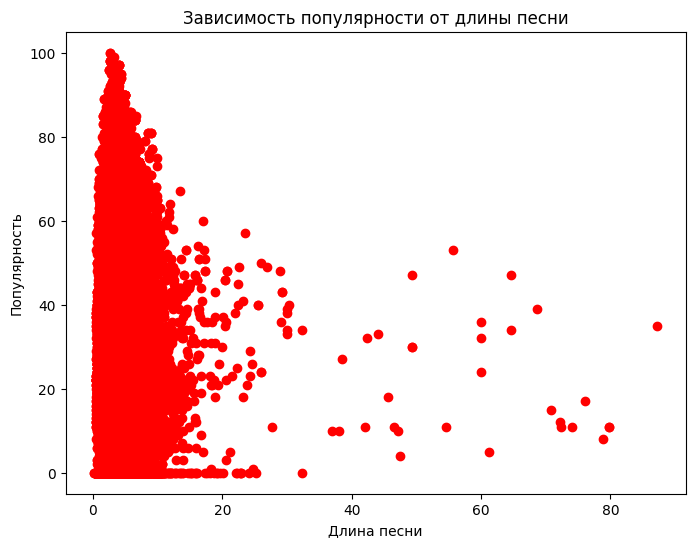

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data['duration_m'], data['popularity'], label='Популярность', marker='o', linestyle='', color='red')
plt.xlabel('Длина песни')
plt.ylabel('Популярность')
plt.title('Зависимость популярности от длины песни')
plt.show()

Самые популярные песни имеют длину до 5 минут

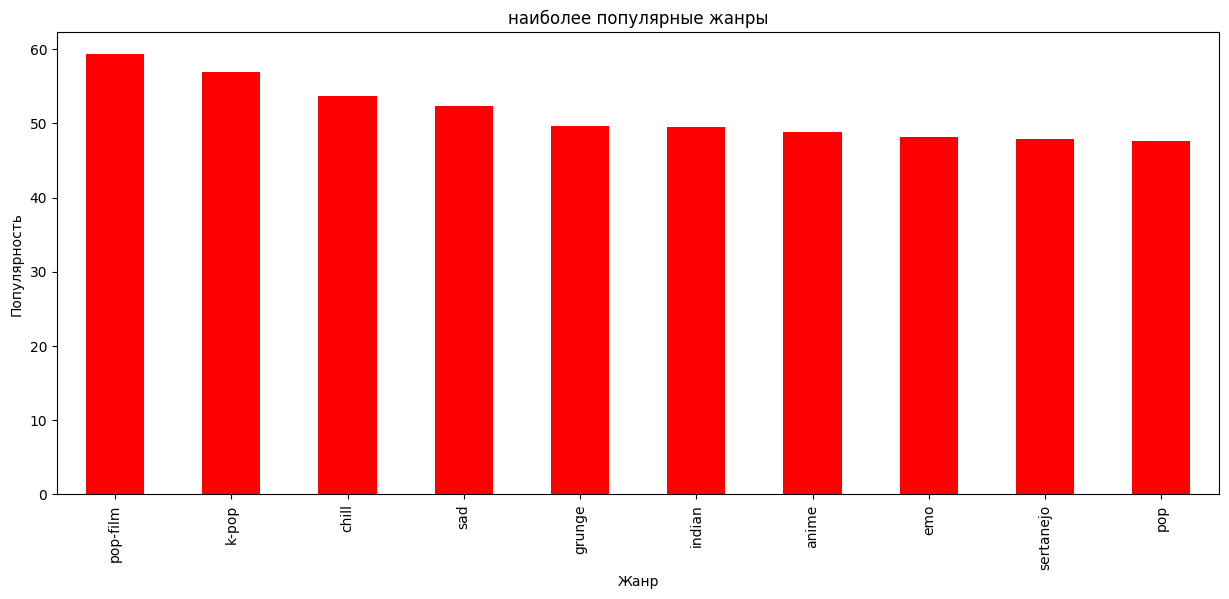

In [17]:
plt.figure(figsize=(15,6))
generes_df = orig_df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).head(10)
generes_df.plot(kind='bar', color='red')
plt.title('наиболее популярные жанры')
plt.xlabel("Жанр")
plt.ylabel("Популярность")
plt.show()

Наиболее популярные жанры - это поп-культура либо музыка подл настроение(sad, chill)

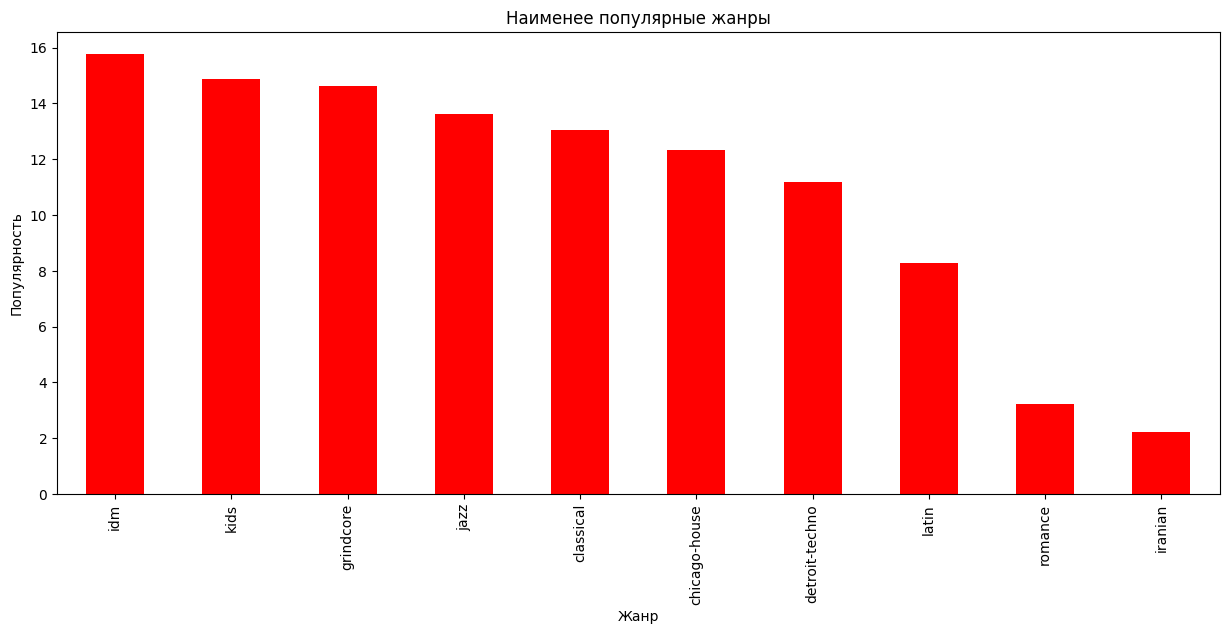

In [18]:
plt.figure(figsize=(15,6))
generes_df = orig_df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).tail(10)
generes_df.plot(kind='bar', color='red')
plt.title('Наименее популярные жанры')
plt.xlabel("Жанр")
plt.ylabel("Популярность")
plt.show()

Наименее популярные жанры - редкие, с небольшим сообществом либо национальные

Text(0.5, 1.0, 'Зависимость популярности от explicit-контента')

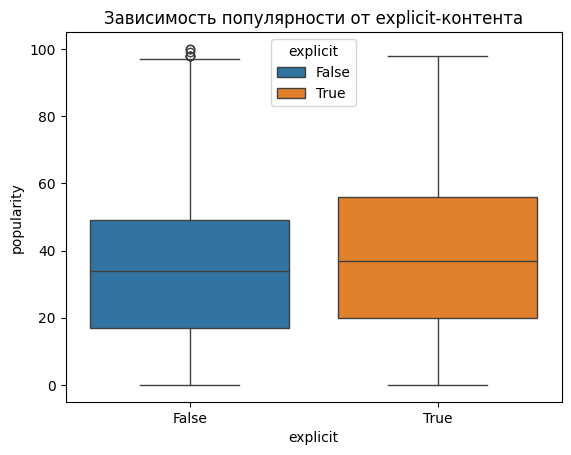

In [19]:
sns.boxplot(x='explicit', y='popularity', data=data, hue='explicit')
plt.title('Зависимость популярности от explicit-контента')


explicit-контент почти не влияет на популярность, но треки с explicit чуть популярнее в среднем

Text(0.5, 1.0, 'Зависимость популярности от громкости')

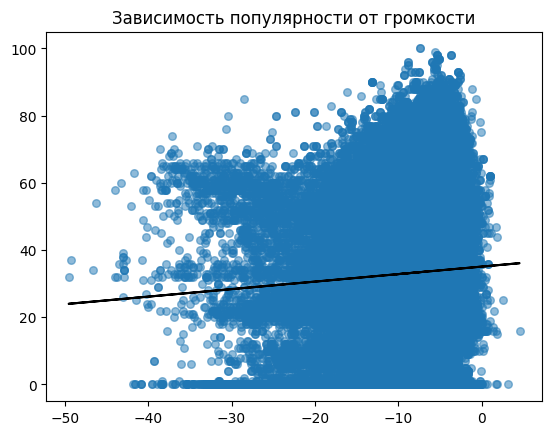

In [20]:
plt.scatter(data["loudness"], data['popularity'], s=30, alpha=0.5)
plt.plot(data["loudness"], np.poly1d(np.polyfit(data["loudness"], data['popularity'], 1))(data["loudness"]), color='black')

plt.title("Зависимость популярности от громкости")

Четко видно корреляцию между громкостью и популярностью: тихие треки менее популярны.  Самые популярные находятся на громкости от -10 до -5

Text(0.5, 1.0, 'Зависимость популярности от valence')

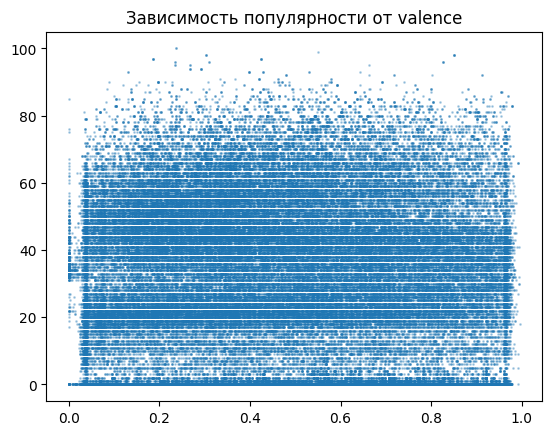

In [21]:
plt.scatter(data['valence'], data['popularity'], alpha=0.3, s=1)
plt.title("Зависимость популярности от valence")

Популярность не зависит от valence - позитивные и негативные треки одинакого популярны

### Гипотеза: синглы популярнее треков, составляющих альбомы

In [22]:
average_popularity = data.groupby("album_name")['popularity'].count()

# Присоединяем average_popularity к исходному DataFrame
data = pd.merge(data, average_popularity.reset_index(), 
                    on="album_name", how='left')

# Изменяем названия столбцов
data = data.rename(columns={'popularity_y': 'number_of_songs_in_album', 
                                    'popularity_x': 'popularity'})
data

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_m,number_of_songs_in_album
0,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433,4
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500,2
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767,1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550,1
4,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650,4
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667,4
113996,Cesária Evora,Best Of,Miss Perfumado,22,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433,26
113997,Michael W. Smith,Change Your World,Friends,41,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550,2


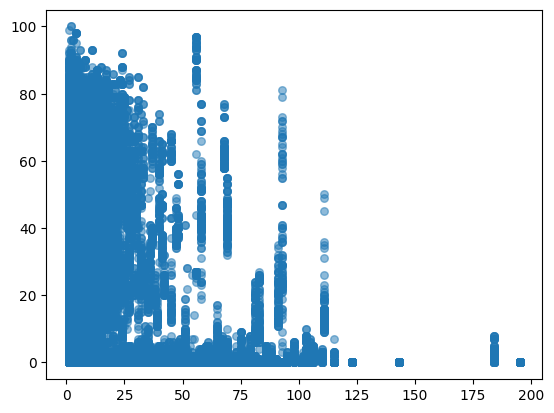

In [23]:
plt.scatter(data["number_of_songs_in_album"], data['popularity'], s=30, alpha=0.5)

In [24]:
data.groupby("number_of_songs_in_album")['popularity'].mean()

number_of_songs_in_album
1      37.991987
2      41.456434
3      39.978513
4      40.071447
5      37.765918
         ...    
115     0.330435
123     0.000000
143     0.000000
184     1.913043
195     0.000000
Name: popularity, Length: 103, dtype: float64

Гипотеза не подтвердилась: синглы не популярнее, однако чем больше треков в альбоме тем они менее популярны, в среднем

## Выводы анализа данных

На популярность точно влияют:
1. Длительность трека - популярные треки редко длятся дольше 5 минут
2. Жанр - некоторые жанры созданы для массового потребителя(pop, k-pop...), некоторые имеют большую аудиторию, а другие наоборот 
3. Громкость - самые популярные треки не тихие и не слишком громкие, около -10..-5
4. количество треков в альбоме
На популярность не влияют:
1. Valance - позитивные и негативные треки одинакого популярны


не определенно explicit-контента - хоть треки с ним немного поплярнее в среднем у non-explicit больше хитов, о чем говорят всплески

# Объединение столбцов

## кодировка нечисловых значений

In [25]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [26]:
categorical_features

['artists', 'album_name', 'track_name', 'track_genre']

In [27]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [28]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [29]:
data.isnull().sum()

artists                     0
album_name                  0
track_name                  0
popularity                  0
explicit                    0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
time_signature              0
track_genre                 0
duration_m                  0
number_of_songs_in_album    0
dtype: int64

## Тепловая карта корреляций

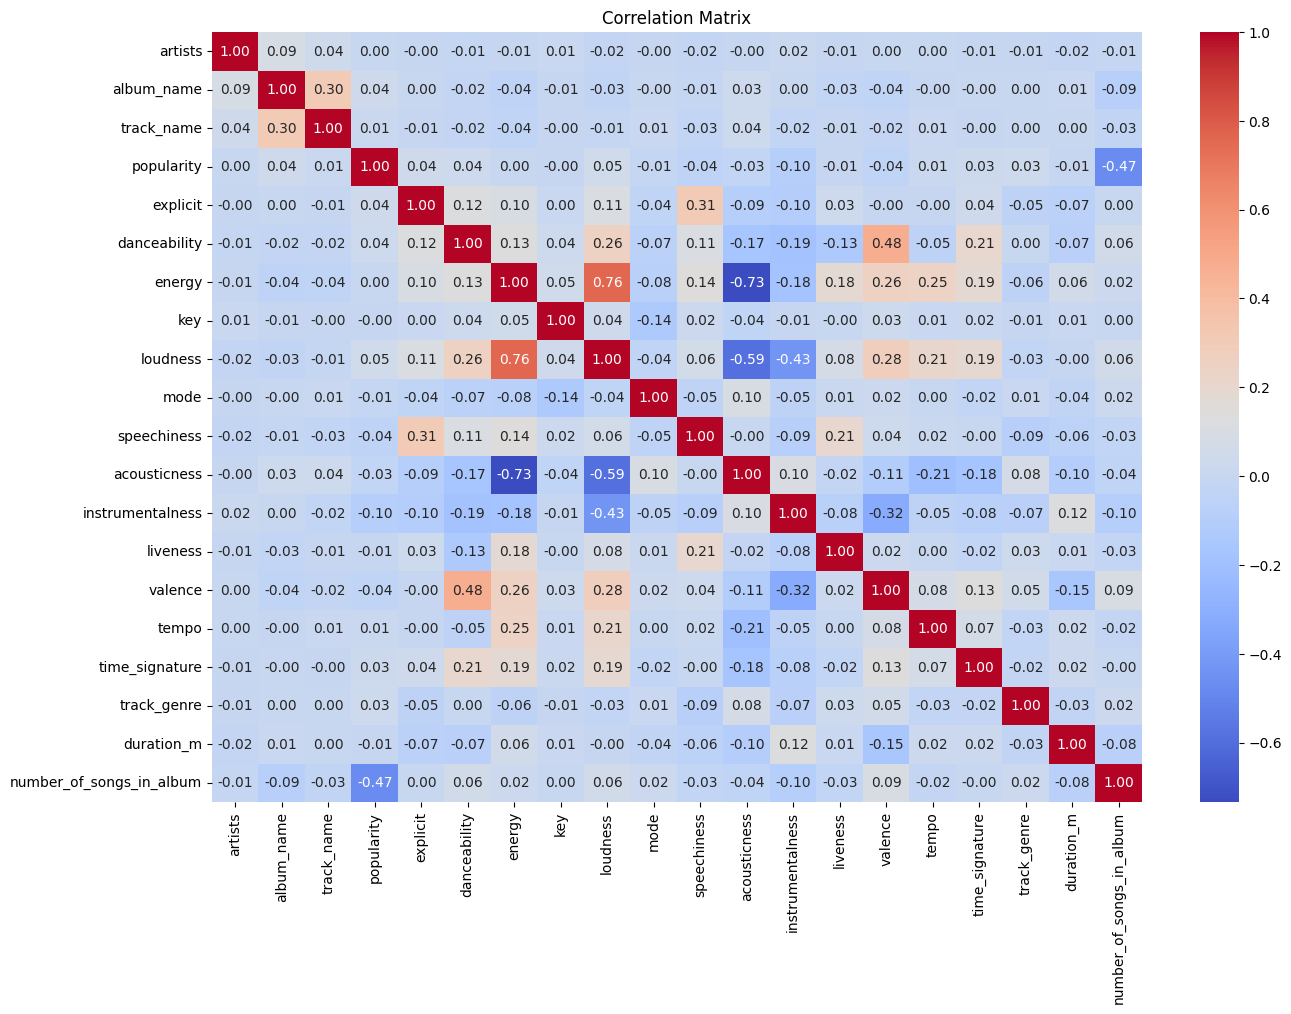

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Из тепловой карты корреляции видно, что:
1. energy имеет очень сильную корреляцию с loudness, tempo, valence и сильную отрицательную с acousticness
2. number_of_songs_in_album коррелирует с популярностью
3. инструментальность имеет отрицательную корреляцию с loudness и valence
4. корреляция названия альбома и трека уже была рассмотрена ранее

In [31]:
data.drop(['valence'], axis=1, inplace=True) # Удаляем, так как не было обнаружено связи

In [32]:
data['energy'] = data['energy'] * data['loudness'] * data['tempo'] * data['acousticness']

In [33]:
data.drop(['loudness', 'tempo', 'acousticness'], axis=1, inplace=True) # Удаляем, так как использовали их для задания energy

## Проверяем, не потеряли ли данные

In [35]:
data

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,mode,speechiness,instrumentalness,liveness,time_signature,track_genre,duration_m,number_of_songs_in_album
0,10357,8100,11741,73,False,0.676,-8.803918,1,0,0.1430,0.000001,0.3580,4,0,3.844433,4
1,3287,14796,22528,55,False,0.420,-204.847847,1,1,0.0763,0.000006,0.1010,4,0,2.493500,2
2,12397,39162,60774,57,False,0.438,-56.015953,0,1,0.0557,0.000000,0.1170,4,0,3.513767,1
3,14839,8580,9580,71,False,0.266,-181.496845,0,1,0.0363,0.000071,0.1320,3,0,3.365550,1
4,5255,16899,25689,82,False,0.618,-241.264498,2,1,0.0526,0.000000,0.0829,4,0,3.314217,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22486,66,53329,21,False,0.172,-310.641580,5,1,0.0422,0.928000,0.0863,5,113,6.416650,4
113995,22486,66,65090,22,False,0.174,-181.588628,0,0,0.0401,0.976000,0.1050,4,113,6.416667,4
113996,4952,5028,38207,22,False,0.629,-411.394087,0,0,0.0420,0.000000,0.0839,4,113,4.524433,26
113997,18534,7238,21507,41,False,0.587,-285.413589,7,1,0.0297,0.000000,0.2700,4,113,4.731550,2


In [41]:
data.isnull().sum()

artists                     0
album_name                  0
track_name                  0
popularity                  0
explicit                    0
danceability                0
energy                      0
key                         0
mode                        0
speechiness                 0
instrumentalness            0
liveness                    0
time_signature              0
track_genre                 0
duration_m                  0
number_of_songs_in_album    0
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   artists                   113999 non-null  int64  
 1   album_name                113999 non-null  int64  
 2   track_name                113999 non-null  int64  
 3   popularity                113999 non-null  int64  
 4   explicit                  113999 non-null  bool   
 5   danceability              113999 non-null  float64
 6   energy                    113999 non-null  float64
 7   key                       113999 non-null  int64  
 8   mode                      113999 non-null  int64  
 9   speechiness               113999 non-null  float64
 10  instrumentalness          113999 non-null  float64
 11  liveness                  113999 non-null  float64
 12  time_signature            113999 non-null  int64  
 13  track_genre               113999 non-null  i

# Модели

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['popularity'])
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Sequential

In [45]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

C:\Users\SystemX\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 515.7755 - val_loss: 340.9158
Epoch 2/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 341.0558 - val_loss: 335.8996
Epoch 3/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 334.9404 - val_loss: 333.2548
Epoch 4/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 332.6887 - val_loss: 327.7317
Epoch 5/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 329.5682 - val_loss: 325.9908
Epoch 6/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 331.7541 - val_loss: 324.2502
Epoch 7/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 324.0086 - val_loss: 320.3878
Epoch 8/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 322.3398 - val_loss: 318.7132
Epoch 9/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 319.6167 - val_loss: 316.5084
Epoch 10/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 317.6077 - val_loss: 314.3262
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 316.5821
Test Loss: 309.2352

In [68]:
# Прогнозирование на тестовой выборке
y_pred_seq = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_seq)
mse = mean_squared_error(y_test, y_pred_seq)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
MAE: 13.698823928833008
RMSE: 17.58508889833941


MSE = квадрат
MAE = модуль
RMSE = MSE с корнем

R2

MAPE. 

In [59]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_seq)
mape # mape слишком большой из-заделения на эпсилон

7758908886089728.0

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
713/713 ━━━

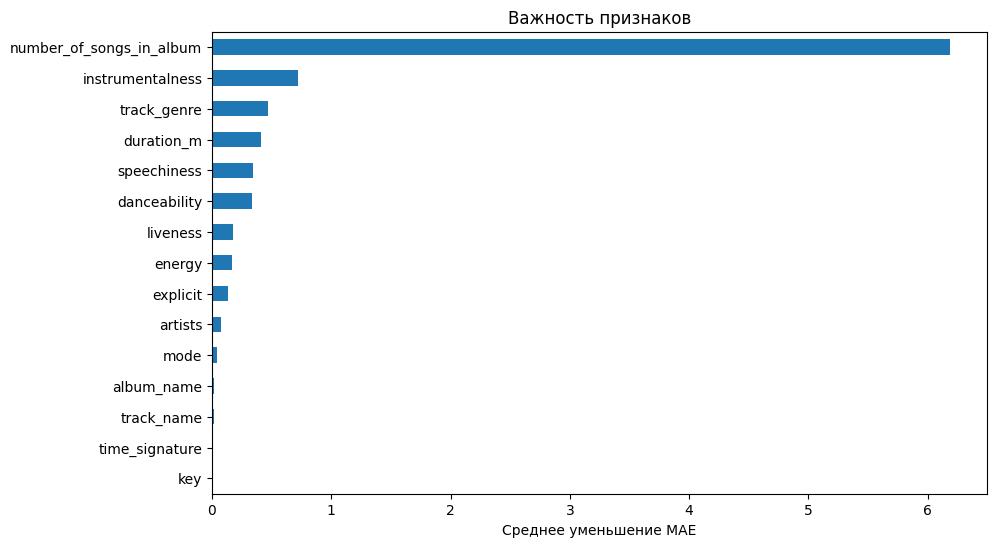

In [60]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

In [70]:
from sklearn.metrics import r2_score

seq_r2 = r2_score(y_true=y_test, y_pred = y_pred_seq)
seq_r2


0.37665408849716187

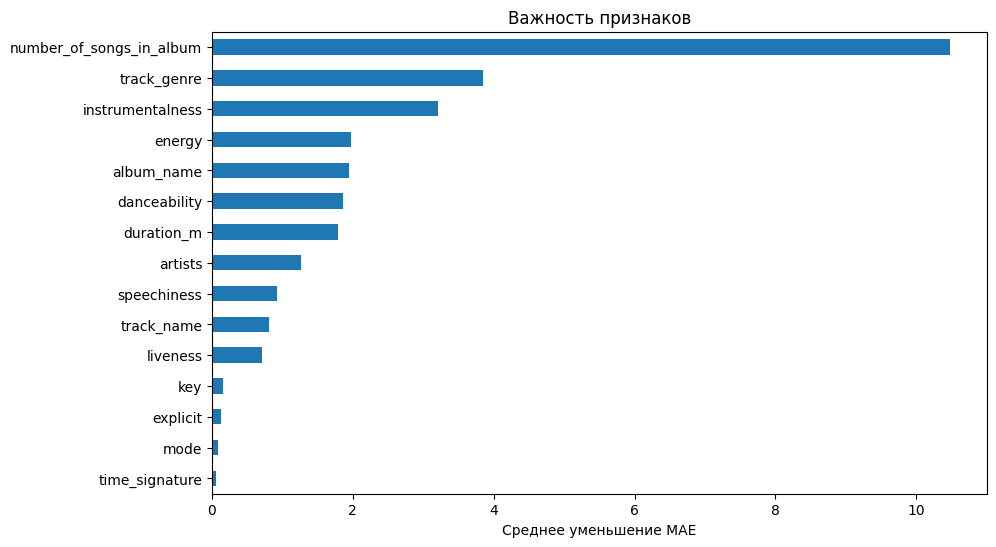

In [61]:
# Важность признаков с помощью permutation importance
result = permutation_importance(random_forest, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter= 1000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
score = logreg.score(X_train, y_train)
acc_log = round(score * 100, 5)


print(score)
print(acc_log)

0.14660248467636708
14.66025


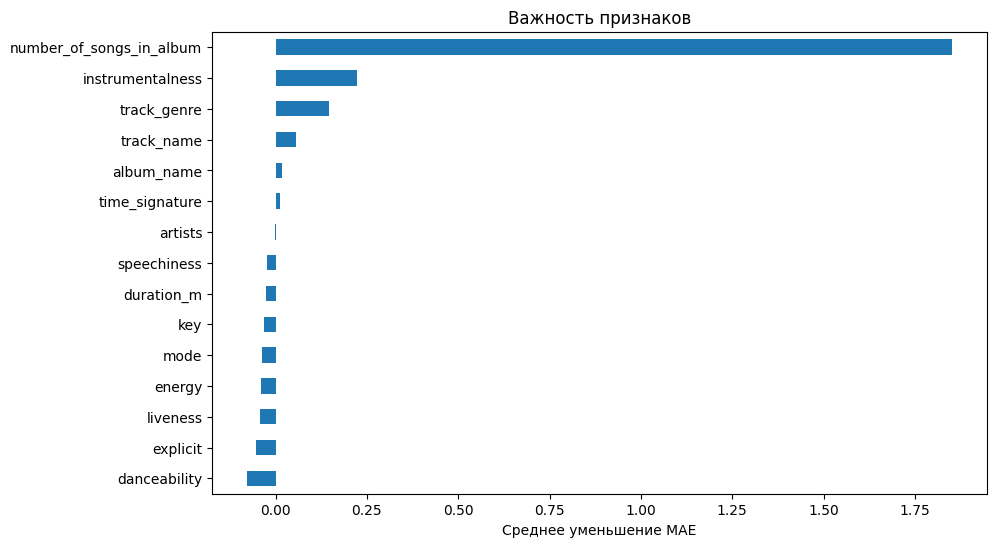

In [62]:
# Важность признаков с помощью permutation importance
result = permutation_importance(logreg, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Gradient Boosting Regressor

In [54]:

from sklearn.ensemble import GradientBoostingRegressor


reg = GradientBoostingRegressor(n_estimators=200, random_state=42, learning_rate=0.1, min_samples_split= 15, min_samples_leaf=10 )
reg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
reg.score(X_test, y_test)


0.5362353392866412

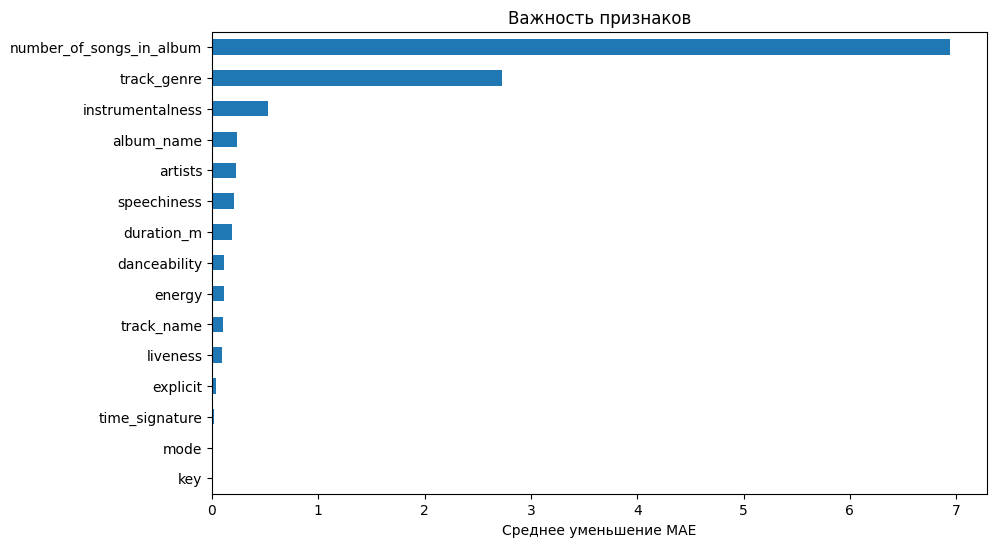

In [65]:
# Важность признаков с помощью permutation importance
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 5)
acc_random_forest

39.83772

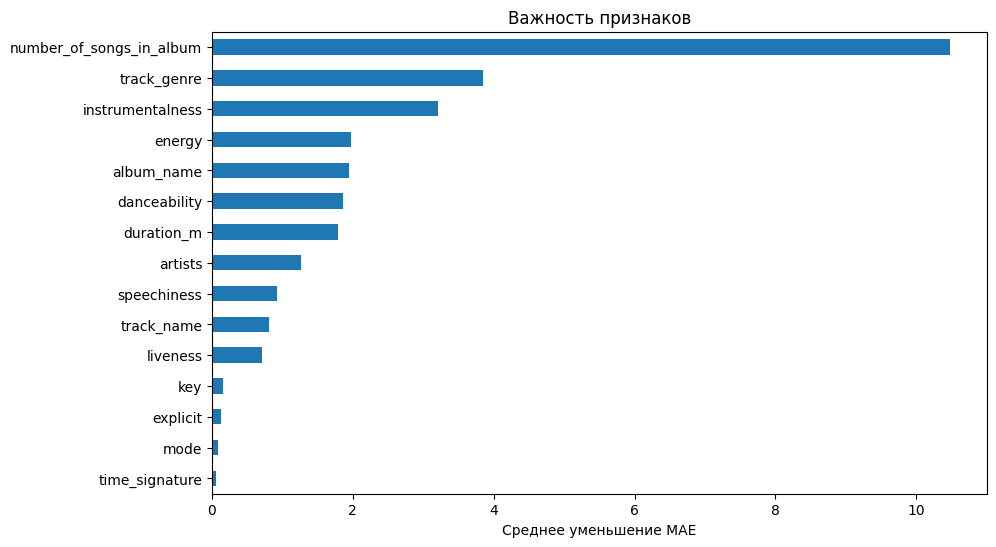

In [66]:
# Важность признаков с помощью permutation importance
result = permutation_importance(random_forest, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Вывод

В ходе работы мы сократили количество столбцов, убрав незначащие и сократив коррелирующие. 
Рассмотрели 4 моделей:  
Модель                                R2
Sequential                            0.38  
Logistic Regression                   0.14  
Gradient Boosting Regressor           0.54  
Random Forest                         0.40

Лучше всего результат у Gradient Boosting Regressor, более половины успешных  предсказаний.